# Recurrence Quantification Analysis

In [1]:
import numpy as np
import nolds
import scipy.io
import mne
import pandas as pd
import seaborn as sns
import pyqtgraph as pg
from scipy.io import loadmat
from scipy import stats
import matplotlib.pyplot as plt
import antropy as ent
from attractors import Attractor
from antropy import higuchi_fd
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.computation import RQAComputation
from pyrqa.time_series import TimeSeries
from pyrqa.result import RQAResult
from pyrqa.opencl import OpenCL
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.neighbourhood import FixedRadius
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.image_generator import ImageGenerator
import numpy as np
import matplotlib.pyplot as plt
from antropy import higuchi_fd

In [2]:
# Load data
data = loadmat('/home/vincent/AAA_projects/University/MSc_AI/Final_Project/downsampled/EEG_DS_Struct_0101.mat')

In [3]:
DSamp = data['DSamp']

triggers = DSamp[0][0][0]
EEGdata = DSamp[0][0][1]
fs = DSamp[0][0][2][0][0] 
fsOld = DSamp[0][0][3][0][0] 
time = DSamp[0][0][4][0]
label = DSamp[0][0][5]
nchan = DSamp[0][0][6][0][0]
rate = DSamp[0][0][7][0][0]
npt = DSamp[0][0][8][0][0]
Subj = DSamp[0][0][9][0]
ptrackerPerf = DSamp[0][0][10]
ptrackerTime = DSamp[0][0][11]
ptrackerfs = DSamp[0][0][12][0][0]

In [4]:
# Normalize the data
norm_data = (EEGdata - np.mean(EEGdata, axis=0)) / np.std(EEGdata, axis=0)

# Parameters for the time series
embedding_dimension = 3
time_delay = 1

# Prepare the data as a TimeSeries object
time_series = TimeSeries(norm_data[0, :], embedding_dimension=embedding_dimension, time_delay=time_delay) # Change norm_data[0, :] to use different channels

# RQA settings
settings = Settings(time_series, neighbourhood=FixedRadius(0.5), similarity_measure=EuclideanMetric())

# RQA computation
computation = RQAComputation.create(settings)
result = computation.run()

# Get the recurrence matrix
recurrence_matrix = result.recurrence_matrix_reverse

# Plot recurrence plot
plt.imshow(recurrence_matrix, cmap='binary', origin='lower')
plt.title('Recurrence Plot')
plt.show()

2 warnings generated.


KeyboardInterrupt: 

In [5]:
import pyts
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint

# Parse the 'DSamp' struct
DSamp = data['DSamp'][0, 0]
EEGdata = DSamp[1]
fs = DSamp[3][0][0]  # downsampled sampling frequency in Hz
npt = DSamp[11][0][0]  # number of data points
Subj = DSamp[12][0]  # subject and session identifier

In [6]:
import mne
import numpy as np

# Assuming 'EEGdata' is a 2D numpy array with shape (n_channels, n_times)
sfreq = fs  # Your sampling frequency

# Get the number of channels from EEGdata
n_channels = EEGdata.shape[0]

# Create an MNE Info object (this requires the names of your EEG channels)
ch_names = ['ch{}'.format(i) for i in range(1, n_channels + 1)]
ch_types = ['eeg'] * len(ch_names)
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Create Raw object
raw = mne.io.RawArray(EEGdata, info)

# Apply band-pass filter
raw.filter(l_freq=1., h_freq=50.)

# Standardize data (mean 0, variance 1)
raw_standardized = (raw.get_data() - np.mean(raw.get_data())) / np.std(raw.get_data())

# If your data have multiple channels and you want to use RQA on each channel separately,
# you should split your data here
eeg_data_split = np.split(raw_standardized, len(ch_names), axis=0)

# Now 'eeg_data_split' is a list of 1D numpy arrays, each one representing a channel
# You can now use these arrays as inputs for your RQA computations

Creating RawArray with float64 data, n_channels=35, n_times=4227788
    Range : 0 ... 4227787 =      0.000 ...  2113.894 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6601 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    7.1s finished


In [7]:
# Parameters for the time series
embedding_dimension = 3
time_delay = 1

# Prepare the data as a TimeSeries object
time_series = TimeSeries(EEGdata,
                         embedding_dimension=3,
                         time_delay=1)

# RQA settings
settings = Settings(time_series,
                    neighbourhood=FixedRadius(0.5),
                    similarity_measure=EuclideanMetric())

# Perform RQA computation
rqa_computation = RQAComputation.create(settings)
rqa_result = rqa_computation.run()

print('Recurrence Rate: ', rqa_result.recurrence_rate)
print('Determinism: ', rqa_result.determinism)
print('Laminarity: ', rqa_result.laminarity)

Recurrence Rate:  0.046831955922865015
Determinism:  1.0
Laminarity:  0.49019607843137253


In [ ]:
from pyts.image import RecurrencePlot

downsample_rate = 100  # Adjust this to your needs

# Compute the recurrence plot for each channel
for i in range(time_series.shape[0]):
    downsampled_time_series = time_series[i, ::downsample_rate]
    X = np.array([downsampled_time_series])  # 2D array

    rp = RecurrencePlot(threshold='point', percentage=20)
    X_rp = rp.fit_transform(X)

    plt.figure(figsize=(10, 10))
    plt.imshow(X_rp[0], cmap='binary', origin='lower')
    plt.title(f'Recurrence Plot for Channel {i+1}')
    plt.colorbar(label='Recurrence Intensity')  # Add colorbar
    plt.show()



NameError: name 'time_series' is not defined

In [28]:
# Index into the 2D array
nested_data = data['DSamp'][0, 0]

# Access fields
time = nested_data['time']
offset = nested_data['offset']
code = nested_data['code']
type_field = nested_data['type']  # 'type' is a reserved keyword in Python, so be careful with naming
label = nested_data['Label']
stim_type = nested_data['StimType']

# and so on for other fields...

# Convert fields to proper numpy arrays if needed, e.g., for 'code'
code_array = np.array([item[0] for item in code])

# Similarly, you can convert other fields to numpy arrays as needed

ValueError: no field of name offset

In [29]:
# Initiate empty list for stim start indices
stim_indices = []

# Loop through all elements in triggers
for i, trigger in enumerate(triggers):
    # If the fifth element of the tuple is 'Stim Start', append the index to stim_indices
    if trigger[4] == 'Stim Start':
        stim_indices.append(i)

# Convert to numpy array
stim_indices = np.array(stim_indices)

/tmp/ipykernel_125391/101469855.py:7: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  if trigger[4] == 'Stim Start':


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already extracted the relevant data from your structure
eeg_data = DSamp[0][0][1]

# Get the number of channels
nchan = eeg_data.shape[0]

# Create the time array (replace with your actual time array)
time = np.arange(eeg_data.shape[1])

# Set up the figure and axis
fig, ax = plt.subplots()

# Plot each EEG channel on the same axis
for channel in range(nchan):
    ax.plot(time, eeg_data[channel], label=f'Channel {channel+1}')

# Set plot labels and title
ax.set_xlabel('Time')
ax.set_ylabel('EEG Amplitude')
ax.set_title('EEG Data')

# Add legend
ax.legend()

# Show the plot
plt.show()

IndexError: tuple index out of range

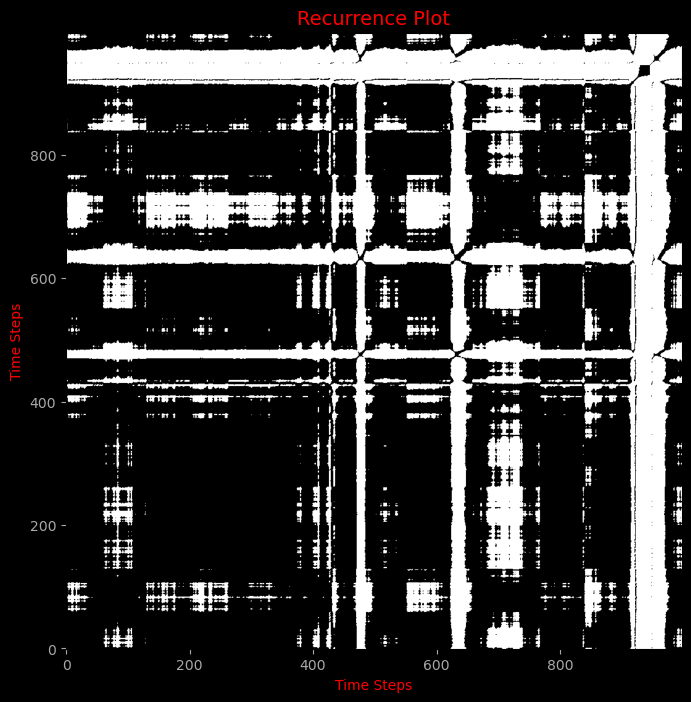

In [25]:
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot

# Downsample factor
downsample_factor = 10  # Further downsample the data

# Select a segment of the data
start_time = 1  # Adjust these to your needs
end_time = 10000

# Downsample the data and select a segment
downsampled_channel_data = EEGdata[0, start_time:end_time:downsample_factor]

# Create a RecurrencePlot object
rp = RecurrencePlot(dimension=embedding_dimension, time_delay=time_delay, threshold='distance')

# Transform the time series into a Recurrence Plot
X_rp = rp.fit_transform(downsampled_channel_data.reshape(1, -1))

# Plot the result
fig, ax = plt.subplots(figsize=(8, 8))

# Set black background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Draw the recurrence plot
im = ax.imshow(X_rp[0], cmap='binary', origin='lower')

# Set title and labels with red color
ax.set_title('Recurrence Plot', fontsize=14, color='red')
ax.set_xlabel('Time Steps', color='red')
ax.set_ylabel('Time Steps', color='red')

# Change ticks color to dark grey
ax.tick_params(colors='darkgrey')

# Show the plot
plt.show()

In [26]:
# Add TES stimulation to the EEG data
eeg_data_with_stimulation = eeg_data + stimulation_waveform

# Calculate RQA measures for the EEG data with TES stimulation
rqa_measures_with_stimulation = rqa(eeg_data_with_stimulation)

# Calculate the fractal dimension of the EEG data with TES stimulation
fd_with_stimulation = pyeeg.pfd(eeg_data_with_stimulation)

# Visualize the results
plt.subplot(2, 2, 1)
plt.plot(eeg_data)
plt.title("EEG data")

plt.subplot(2, 2, 2)
plt.plot(stimulation_waveform)
plt.title("TES stimulation")

plt.subplot(2, 2, 3)
plt.plot(eeg_data_with_stimulation)
plt.title("EEG data with TES stimulation")

plt.subplot(2, 2, 4)
plt.bar(range(len(rqa_measures)), rqa_measures)
plt.bar(range(len(rqa_measures_with_stimulation)), rqa_measures_with_stimulation)
plt.title("RQA measures")

plt.show()

print("Fractal dimension of EEG data:", fd)
print("Fractal dimension of EEG data with TES stimulation:", fd_with_stimulation)

NameError: name 'eeg_data' is not defined